In [41]:
import json
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [42]:
log_path = '../Data/ML/2024-03-04/log/'
log_list = os.listdir(log_path)

In [43]:
print(log_list)
hidden_list = []

layer1_train_list = []
layer2_train_list = []

layer1_time_list = []
layer2_time_list = []
for hidden in log_list:
    hidden_list.append(int(hidden))
    for layer in os.listdir(os.path.join(log_path,hidden)):
        # log
        df = pd.read_csv(os.path.join(log_path,hidden,layer,'log.csv'))
        last_cal = df['Test'].iloc[-1]
        if layer == '1':
            layer1_train_list.append(float(last_cal))
        else:
            layer2_train_list.append(float(last_cal))

        # json
        with open(os.path.join(log_path,hidden,layer,'trace.json'), 'r') as file:
            # Step 2: Parse the JSON file
            data = json.load(file)
            specific_data = data['traceEvents']
            time = specific_data[0]['ts']-specific_data[-4]['ts']

            if layer == '1':
                layer1_time_list.append(float(time))
            else:
                layer2_time_list.append(float(time))

        

['10', '11', '12', '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24', '25', '26', '27', '28', '29', '30']


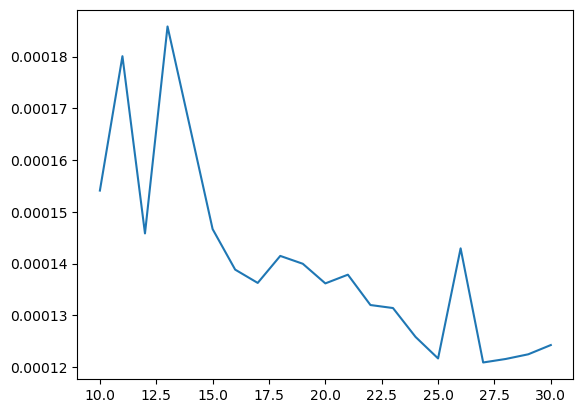

In [46]:
plt.plot(hidden_list,layer2_train_list)